##This dataset is sourced from Kaggle (https://www.kaggle.com/datasets/ninzaami/loan-predication). 

A given dataset contains loan application information. Analyse this dataset to assist lender to explore, visualise and automate the loan eligibility process based on the information provided by applicants. Lastly, applying the machine learning to identify the key risk drivers for the final loan approval results

Columns of dataframe 
1.Loan_Id:Unique Loan ID
2.Gender:Male/ Female
3.Married:Applicant married (Y/N)
4.Dependents:Number of dependents
5.Education:Applicant Education (Graduate/ Under Graduate)
6.Self_Employed:Self employed (Y/N)
7.ApplicantIncome:Applicant income
8.CoapplicantIncome:Co-applicant income
9.LoanAmount:Loan amount in thousands
10.Loan_Amount_Term:loan terms in months
11.Credit_History:- credit history meets policy (1= meet the policy, 2= not meet policy)
12.Property_Area:- Urban/ Semi Urban/ Rural locations
13.Loan_Status:- Loan approved (Y/N)

##Table of Content

Sec 1) Data exploration, visualisation and analysis
Sec 2) Data filtering and cleaning (pre-processing for modelling purpose)
Sec 3) Machine learning by logistic regression, K-NearestNeighbor, decision tree, random forest and Support Vector Classifier
Sec 4) Review, compare and select the best model(s)
Sec 5) Identify the most importance feature(s) for the best model(s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("loan_app_data.csv")

Section 1: Data exploration, visualisation and analysis

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations: 1)Missing info in Gender, Married,Dependents,Self_employed,LoanAmount,Loan_Amout_Term and Credit_History since row numbers are less than 614 entries. 2)ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amout_Term and Credit_History are int/float type while others are str type 3)Loan_ID column can be droped later since not useful for analysis/modelling purpose.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations: 1)Outliers are present in ApplicantIncome, CoapplicantIncome and LoanAmount columns since max are highly deviated from the mean and quartiles , should be handled during pre-processing stage. 2)Loan terms are mostly 360 days, with max 480 days

In [6]:
#Check the number of null in columns again 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

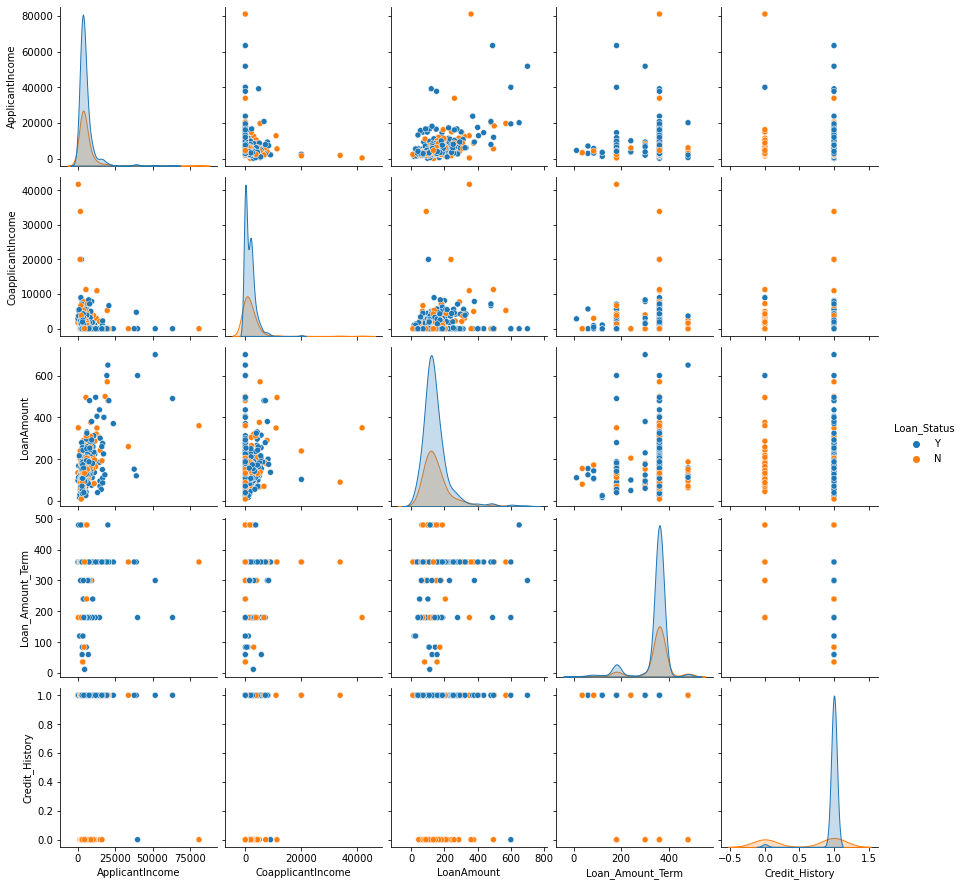

In [7]:
#display the relationship between each numerical columns, highlighted by "Loan_Status"
sns.pairplot(df,hue="Loan_Status")

Observations: 1)ApplicantIncome, CoapplicantIncome and LoanAmout are right skewed, outlier removal reuqired as previously addressed. 2)However,outliers also indicate postive relationship between LoanAmount and ApplicantIncome&CoapplicantIncome 3)Credit_History is highly correlated with Loan_Status

<AxesSubplot:xlabel='Married', ylabel='count'>

<Figure size 720x576 with 0 Axes>

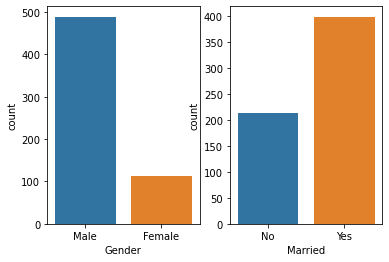

In [8]:
plt.figure(figsize=(10,8))
fig, ax =plt.subplots(1,2)
sns.countplot(x='Gender',data=df, ax=ax[0])
sns.countplot(x='Married',data=df,ax=ax[1])

Observations 1)Male applicants are 4 times greater than female applicants. 2)Married applicants are about 80% more than not-married applicants.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

<Figure size 720x576 with 0 Axes>

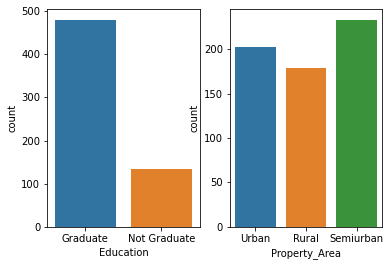

In [9]:
plt.figure(figsize=(10,8))
fig, ax =plt.subplots(1,2)
sns.countplot(x='Education',data=df,ax=ax[0])
sns.countplot(x='Property_Area',data=df,ax=ax[1])

Observations 1)Graduate applicants are 3 times greater than not-graduare applicants 2)Most applicants live in semiurban area, followed by urban area, last one is rural area. But not so much difference.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

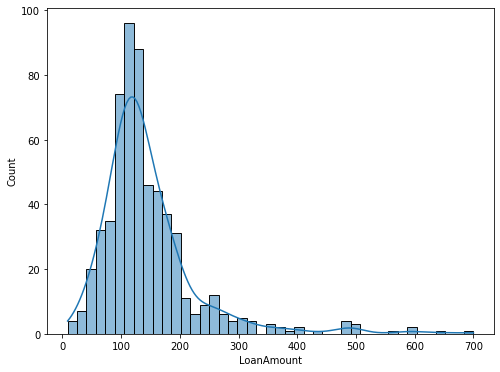

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df['LoanAmount'],kde=True)

Observation: 1)A clear right skewed for loan amount 2)Outlier value is present.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

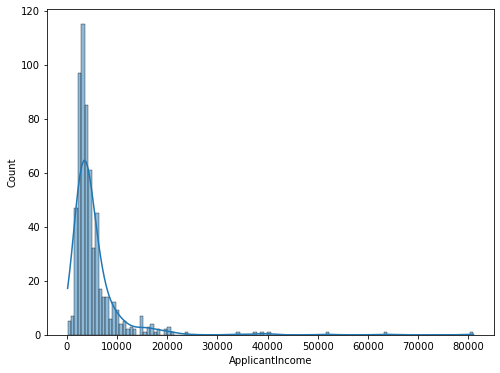

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df['ApplicantIncome'],kde=True)

Observation: 1)A clear right skewed for ApplicantIncome 2)Outlier value is present.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

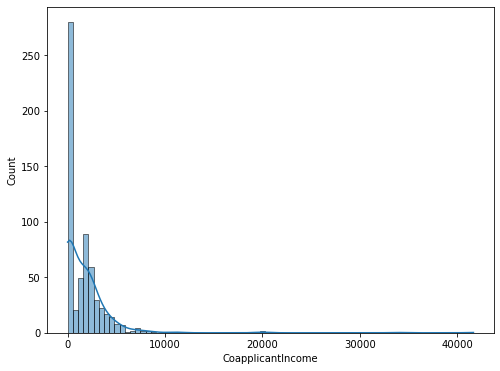

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['CoapplicantIncome'],kde=True)

Observation: 1)A clear right skewed for CoapplicantIncome. 2)Outlier value is present. 3)Also noted many co-applicants have no income

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

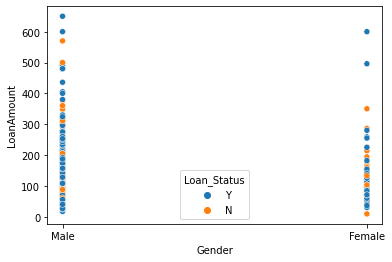

In [13]:
sns.scatterplot(x='Gender',y="LoanAmount",data=df,hue="Loan_Status")

Observations 1)Male applicants are greater than female applicants 2)Loan amount is also higher for Male applicants

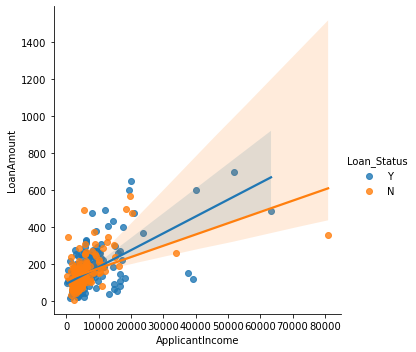

In [14]:
sns.lmplot(x='ApplicantIncome',y="LoanAmount",data=df,hue="Loan_Status")

Observations: 1)Most applicant income are within 25,000 and loan amount are within 400K. 2)However, higher income appears to be correlated with higher loan amount as outliers present above.

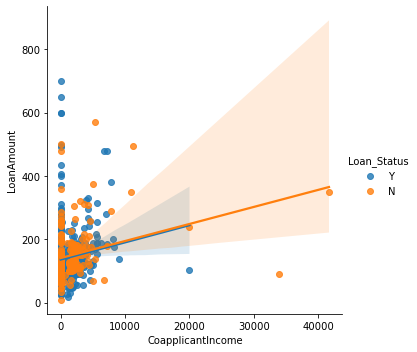

In [15]:
sns.lmplot(x='CoapplicantIncome',y="LoanAmount",data=df,hue="Loan_Status")

Observations: 1)Most coapplicant income are within 8,000 and loan amount are within 300K 2)However, higher income appears to be correlated with higher loan amount as outliers present above.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

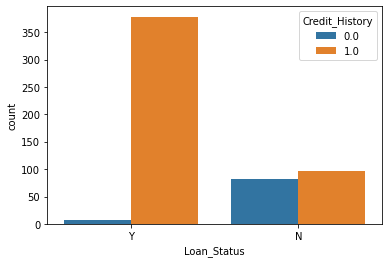

In [16]:
sns.countplot(x="Loan_Status",hue="Credit_History",data=df)

Observations 1)It is clear that loan_Status Approval(Y)is highly correlated with Credit_History 1 (meet bank's credit policy) 2)However, there are few execeptions not meet the credit_history bit still get the loan approval.

Section 2:Data filtering and cleaning (pre-processing for modelling purpose)

In [17]:
df.drop(["Loan_ID"],axis=1,inplace=True)# LoanID column not reuqired

In [18]:
df.isnull().sum() #check null number in each columns

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Check categories in each string column
print(df["Gender"].value_counts())
print(df["Married"].value_counts())
print(df["Dependents"].value_counts())
print(df["Self_Employed"].value_counts())
print(df["Property_Area"].value_counts())
print(df["Education"].value_counts())
print(df["Credit_History"].value_counts())
print(df["Loan_Status"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


Observation: 1)We will need to increase the sample size for Loan_Status "N". Since this is imbalanced dataset between "Y" 422 vs "N" 192. 2)This is required for have a balanced dataset since we will use model to predict Loan_Status in the last step. 3)The upsampling for Loan_Status "N" will be done later.

In [20]:
#Fill the null in each column 
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True) # insert the null by most often gender type in column
df["Married"].fillna(df["Married"].mode()[0],inplace=True) # insert the null by most often Married type in column
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True) # insert the null by most often Dependents type in column
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)# insert the null by most often self_employed type in column
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)# insert the null by mean value in loan amount column
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)# insert the null by most often loan term in column

In [21]:
#Create function to filling null for Credit_History columns based on Loan_Status since most "Y" in Loan_Status has "1" Credit_History- shows different method only
def impute_ch(cols):
    ch = cols[0]
    ls = cols[1]
    
    if pd.isnull(ch):
        if ls == 1:
            return 1
        else:
            return 0
    else:
        return ch

In [22]:
df["Credit_History"] = df[["Credit_History","Loan_Status"]].apply(impute_ch,axis=1)

In [23]:
df.isnull().sum() #check if there still null in any column

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
#Create dummies for each STR column, will use ger_dummies for Property_Area column since it has 3 categories, and also convert the Depedents column to int/float type since it is str type now   
df.replace({'Gender':{"Male":1,"Female":0}},inplace=True)
df.replace({'Married':{"Yes":1,"No":0}},inplace=True)
df.replace({'Dependents':{"0":0,"1":1,"2":2,"3+":3}},inplace=True)
df.replace({'Self_Employed':{"No":0,"Yes":1}},inplace=True)
df.replace({'Education':{"Graduate":1,"Not Graduate":0}},inplace=True)
df.replace({'Loan_Status':{"Y":1,"N":0}},inplace=True)

In [25]:
#use ger_dummies for Property_Area column since it has 3 categories
df=pd.get_dummies(data=df,columns=["Property_Area"], drop_first=True)

In [26]:
#check all the dataframe again
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Semiurban  614 non-null    uint8  
 12  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(7), uint8(2)
memory usage: 54.1 KB


Now all columns are int/float type already, and no null in the dataframe

<AxesSubplot:>

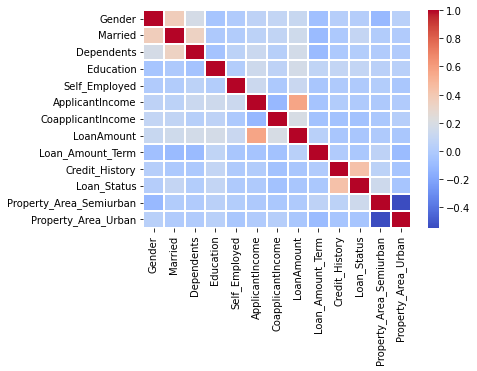

In [28]:
sns.heatmap(df.corr(),cmap="coolwarm",linewidths=2) 

Observation: 1)Use heatmap to check correlation again since all columns are int/float now 2)Loan amount and ApplicantIncome/CoapplicantIncome are correlated. 3)Loan_Status and Credit_History are correlared

In [29]:
#function for removing outlier for loan amount, applicant and coapplicant income since outliers are present. 25% 75% Interquartile range applied
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [30]:
#remove outliers for loan amount
df_la= remove_outlier(df,"LoanAmount") 

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

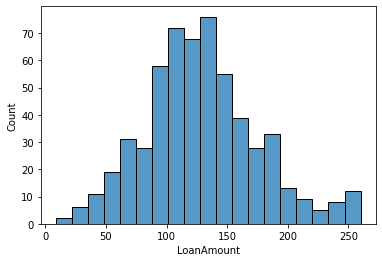

In [31]:
sns.histplot(data=df_la,x="LoanAmount")

In [32]:
#remove outlier for Applicantincome
df_ai= remove_outlier(df_la,"ApplicantIncome")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

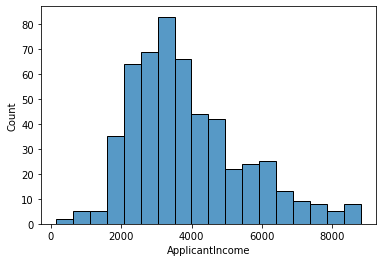

In [33]:
sns.histplot(data=df_ai,x="ApplicantIncome")

In [34]:
#Remove outlier for CoapplicantIncome
df_out= remove_outlier(df_ai,"CoapplicantIncome")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

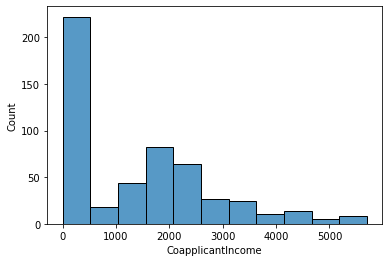

In [35]:
sns.histplot(data=df_out,x="CoapplicantIncome")

Observations: 1)After all outliers removed, three columns are closer to normally distribution 2)This step will increase the accuracy for the models.

In [36]:
df_out.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.00000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,0.813102,0.649326,0.718690,0.747592,0.107900,3881.377649,1356.822582,125.25979,343.352601,0.766859,0.693642,0.385356,0.317919
std,0.390206,0.477642,0.993151,0.434813,0.310553,1594.098060,1425.844869,43.37268,65.091656,0.423239,0.461425,0.487149,0.466117
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.00000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2717.500000,0.000000,99.50000,360.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3541.000000,1330.000000,123.00000,360.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4715.500000,2227.500000,150.00000,360.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,8799.000000,5701.000000,259.00000,480.000000,1.000000,1.000000,1.000000,1.000000


Observations: 1)Now 591 rows, 23 rows reduced from original 614 entries, 3.75% removal considered acceptable. 2)ApplicantIncome,CoapplicantIncome and LoanAmount are still right skewed but closer to normally distributed after outliers removal.

In [37]:
#upsampling the loan status "N", first check how many rows needed to be increase
df_out_approval =df_out[df_out["Loan_Status"]==1]
df_out_reject =df_out[df_out["Loan_Status"]==0]
print(df_out_approval.shape)
print(df_out_reject.shape)

(360, 13)
(159, 13)


"Y" has 360 rows "N" has 159 rows, 201 rows upsampling for Loan_Status "N" reuqired.

In [38]:
#use the len to match the loan status "Y", then check if the "N" also has 360 rows
from sklearn.utils import resample
reject_upsample = resample(df_out_reject,replace=True,n_samples=len(df_out_approval))
reject_upsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 256 to 209
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   360 non-null    int64  
 1   Married                  360 non-null    int64  
 2   Dependents               360 non-null    int64  
 3   Education                360 non-null    int64  
 4   Self_Employed            360 non-null    int64  
 5   ApplicantIncome          360 non-null    int64  
 6   CoapplicantIncome        360 non-null    float64
 7   LoanAmount               360 non-null    float64
 8   Loan_Amount_Term         360 non-null    float64
 9   Credit_History           360 non-null    float64
 10  Loan_Status              360 non-null    int64  
 11  Property_Area_Semiurban  360 non-null    uint8  
 12  Property_Area_Urban      360 non-null    uint8  
dtypes: float64(4), int64(7), uint8(2)
memory usage: 34.5 KB


In [39]:
# now we combine both datafram to create our final dataframe
df_out_final = pd.concat([df_out_approval, reject_upsample])
df_out_final.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.816667,0.655556,0.755556,0.737500,0.119444,3930.802778,1303.502667,126.194792,341.983333,0.684722,0.500000,0.362500,0.326389
std,0.387209,0.475517,1.012425,0.440299,0.324536,1609.520761,1435.020692,41.901666,63.051735,0.464949,0.500348,0.481056,0.469217
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2769.000000,0.000000,100.000000,360.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3598.000000,1211.500000,123.000000,360.000000,1.000000,0.500000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,4750.000000,2209.250000,148.000000,360.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,8799.000000,5701.000000,259.000000,480.000000,1.000000,1.000000,1.000000,1.000000


Observations: 1)We have all columns data type are all int/float. 2)Dataset is balanced with equal loan status "Y" & "N" 3)Total entries 720 now, which is greater then original dataset 614 entries.

Section 3:Machine learning by logistic regression, K-NearestNeighbor, decision tree, random forest and Support Vector Classifier

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=df_out_final.drop("Loan_Status",axis=1,inplace=False)
y=df_out_final["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
logmodel = LogisticRegression(max_iter=400)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [44]:
pred_log = logmodel.predict(X_test)

In [45]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       116
           1       0.63      0.78      0.70       100

    accuracy                           0.69       216
   macro avg       0.70      0.70      0.69       216
weighted avg       0.70      0.69      0.69       216



Observation: 1)Precision 63% for class 1 (loan approval) and recall for class 0 (loan reject) only 61%. 2)The above shows the model does not perform well espically the recall for class 0 61% indicates model only predicred 61% of actual application should not being approved.

In [46]:
# try to predict which K value for KNN model will preduce least error rate
error_rate = []

for i in range(1,21):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

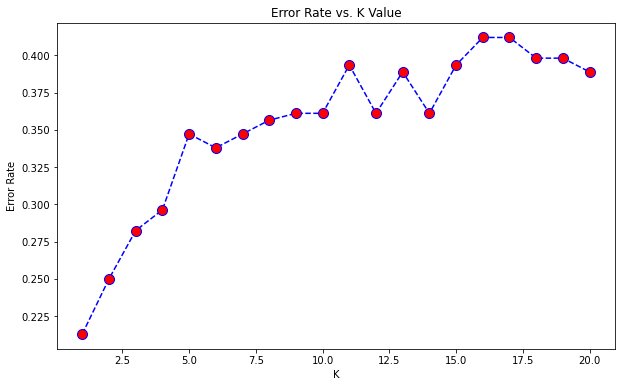

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
knn = KNeighborsClassifier(n_neighbors=2)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [50]:
pred_knn = knn.predict(X_test)

In [51]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       116
           1       0.82      0.59      0.69       100

    accuracy                           0.75       216
   macro avg       0.77      0.74      0.74       216
weighted avg       0.76      0.75      0.74       216



Observations: 1)KNN model does not perform well since precision for class 0 only 72% and recall for class 1 only 59% 2)Not good model for our purpose

In [52]:
dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
pred_dtree = dtree.predict(X_test)

In [55]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       116
           1       0.93      0.80      0.86       100

    accuracy                           0.88       216
   macro avg       0.89      0.87      0.88       216
weighted avg       0.89      0.88      0.88       216



Observations: 1)Decision Tree performs well with the lowest rate 80% for recall class 1. 2)Can predict actually non-qualified application up to 95%.

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
pred_rfc = rfc.predict(X_test)

In [59]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       116
           1       0.91      0.81      0.86       100

    accuracy                           0.88       216
   macro avg       0.88      0.87      0.87       216
weighted avg       0.88      0.88      0.87       216



Observations: 1)Random Forest performs quite well since all rate are above 80%. 2)Can predict actuall non-qualified application 93%(recall class 0).

In [60]:
svm_model = SVC()

In [61]:
svm_model.fit(X_train,y_train)

SVC()

In [62]:
pred_svm = svm_model.predict(X_test)

In [63]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       116
           1       0.56      0.62      0.59       100

    accuracy                           0.60       216
   macro avg       0.60      0.60      0.60       216
weighted avg       0.60      0.60      0.60       216



Observations: 1)SVM model does not perform well since both precision and recall rate are quite low 2)Not good model for our purpose espically the recall for class 0 only 58%, which indicates the model can only predict actual non-qualified application 58% only.

Section 4:Review, compare and select the best model

In [64]:
log_score = round(accuracy_score(y_test,pred_log),2)
knn_score = round(accuracy_score(y_test,pred_knn),2)
dtree_score = round(accuracy_score(y_test,pred_dtree),2)
rfc_score = round(accuracy_score(y_test,pred_rfc),2)
svm_score = round(accuracy_score(y_test,pred_svm),2)

tab_compare = pd.DataFrame({'Model': ['K-Nearest Neighbors','Logistic Regression','Decision Tree','Random Forest','SVC'], 
                        'Accuracy(%)': [knn_score*100, log_score*100, dtree_score*100, rfc_score*100, svm_score *100]})
tab_compare.sort_values(by='Accuracy(%)', ascending=False)

,Model,Accuracy(%)
2,Decision Tree,88.0
3,Random Forest,88.0
0,K-Nearest Neighbors,75.0
1,Logistic Regression,69.0
4,SVC,60.0


Observation (Summary of all models) 1)Decision Tree performs best as it has 88% accuracy rate and high precision&recall rate 2)Random Forest also performs quite well it also has 88% accuracy rate with almost identical precision&recall rate. 3)Rest of models perform poor and should be used as they may incorrectly predict the actual non-qualified application as "qualifed" application and approval the loan, which will hurt the lender.

Section 5:Show the feature of importance for the best model(s)

<AxesSubplot:>

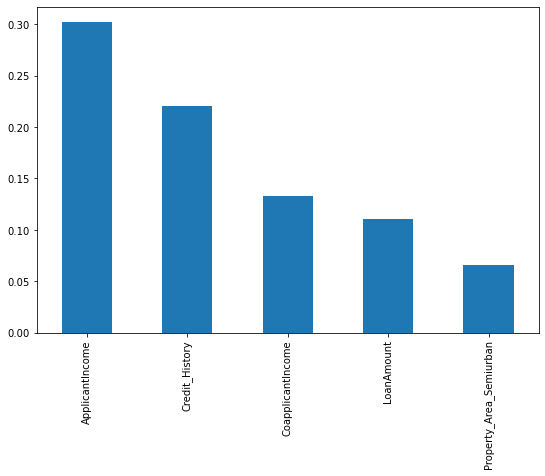

In [65]:
#Feature Importance for Decision Tree Model
dtree_importance = pd.Series(dtree.feature_importances_,
                       index = X_train.columns.values)
dtree_importance.nlargest(5).plot(kind = 'bar',
                            figsize = (9,6))

<AxesSubplot:>

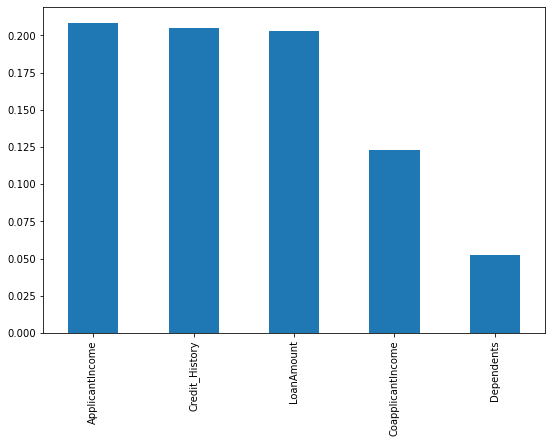

In [66]:
#Feature Importance for Random Forest Model
rfc_importance = pd.Series(rfc.feature_importances_,
                       index = X_train.columns.values)
rfc_importance.nlargest(5).plot(kind = 'bar',
                            figsize = (9,6))

Observation: 
1)Both Dtree and RFC show top 1 feature as ApplicantIncome with credit history as second important features 
2)Loan Amout and co-applicant inocme with weight more than 10% each 
3)The rest of features do not contribute that much importance for both models. So banks may consider to focus on the features with more than 10% weight during assessment while disregarding other less importnant features to improve is efficiency. 

End of the project, Thank you for reading.